In [2]:
import numpy as np
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Dataset PageBlocks do OpenML

In [ ]:
# Carregar
data = fetch_openml(data_id=30, as_frame=True)
X = data.data
y = data.target

# Converter labels para inteiros, se necessário
y = y.astype(int)

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4465, stratify=y)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Formato/Visualização dos dados

In [4]:
#Formato dos dados
print("Formato de x:", X.shape)
print("Formato de y:", y.shape)
print("Número de classes:", len(np.unique(y)))

print("Formato de X_train:", X_train.shape)
print("Formato de X_test:", X_test.shape)

Formato de x: (5473, 10)
Formato de y: (5473,)
Número de classes: 5
Formato de X_train: (3831, 10)
Formato de X_test: (1642, 10)


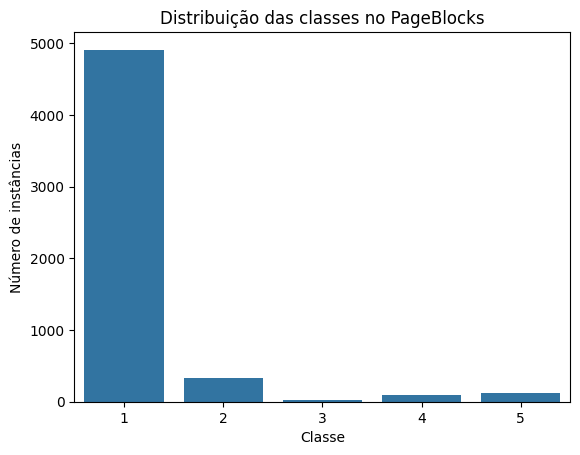

In [5]:
sns.countplot(x=y)
plt.title("Distribuição das classes no PageBlocks")
plt.xlabel("Classe")
plt.ylabel("Número de instâncias")
plt.show()

In [60]:
# Inicializar PCA com 2 componentes
pca = PCA(n_components=2)

# Ajustar PCA com os dados de treino e transformar treino e teste
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Uso do método dual na versão OvO

In [57]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))

Baseline Accuracy: 0.9604141291108405


Caso com PCA para sermos capazes de visualizar graficamente a divisão das classes. Claro que não teremos os melhores resultados, mas é interessante perceber graficamente a separação das classes.

Training binary classifiers: 100%|██████████| 10/10 [07:27<00:00, 44.73s/it, Par=3 vs 4]


Accuracy: 0.91


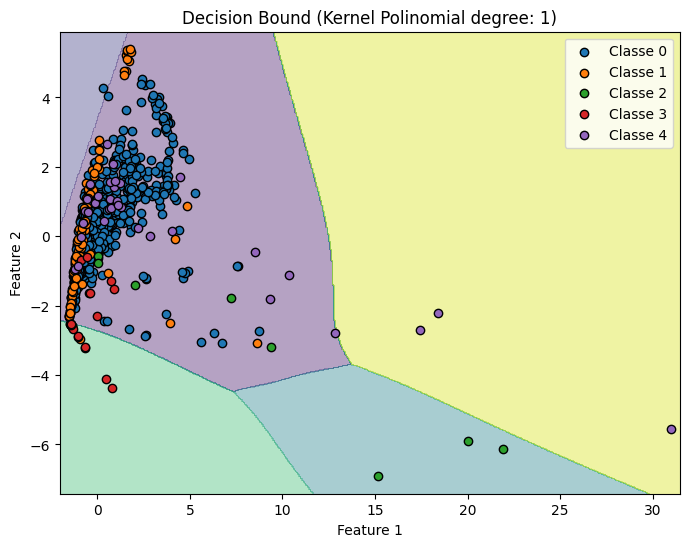

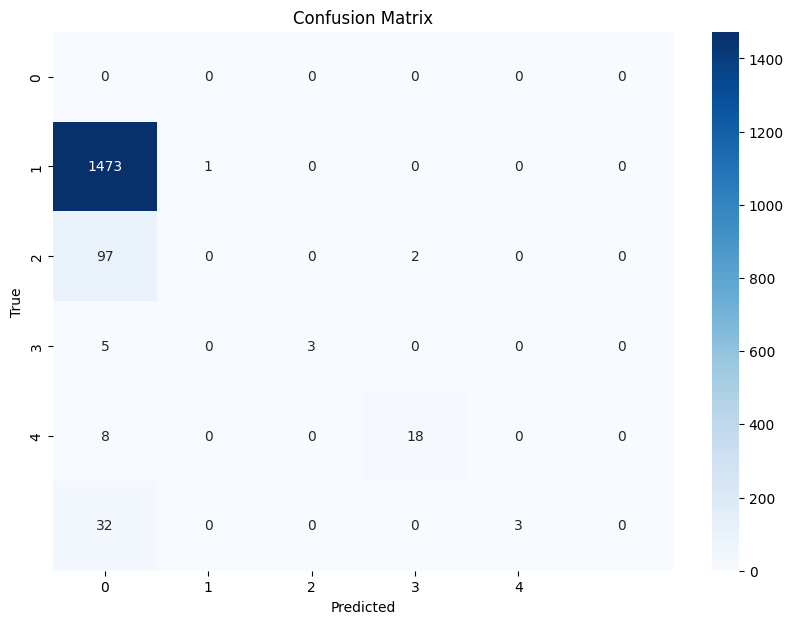

In [ ]:
# Create an instance of the CLog_OVO classifier
clf = CLog_OVO(n_iter=5000, batch_size=1, kernel=2, step=0.001, mode='primal', iterative=True)
    
# Fit the model on the training data
clf.fit(X_train_pca, y_train_encoded)
    
# Make predictions on the test data
y_pred = clf.predict(X_test_pca)
#pribt probs
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
    
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
plot_decision_boundary(clf, X_test_pca, y_test_encoded,500)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Caso de teste com o dataset original

Training binary classifiers: 100%|██████████| 10/10 [07:33<00:00, 45.32s/it, Par=3 vs 4]

Accuracy: 0.97


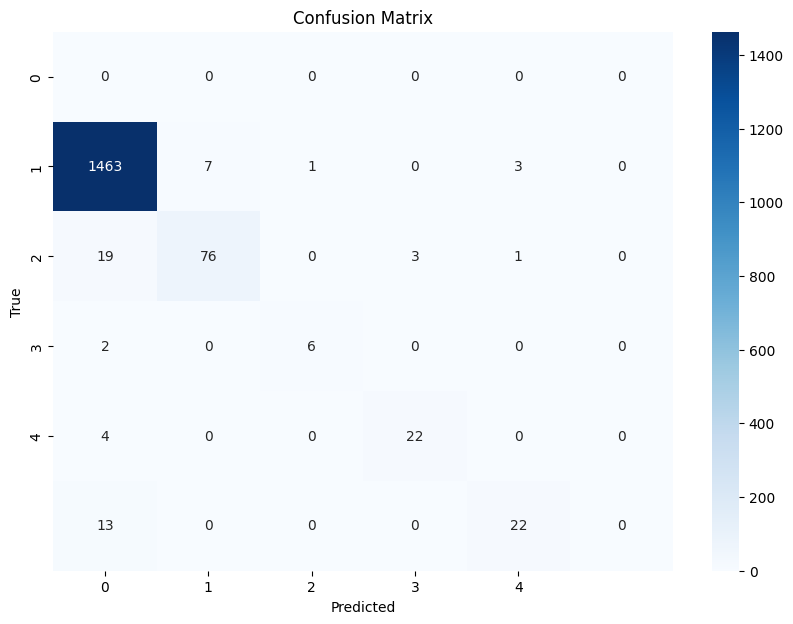

In [7]:
# Create an instance of the CLog_OVO classifier
clf = CLog_OVO(n_iter=5000, batch_size=1, kernel=2, step=0.001, mode='primal', iterative=True)
    
# Fit the model on the training data
clf.fit(X_train, y_train_encoded)
    
# Make predictions on the test data
y_pred = clf.predict(X_test)
#pribt probs
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
    
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Mais algumas informações sobre os resultados

In [9]:
print(classification_report(y_test_encoded, y_pred, target_names=[str(cls) for cls in clf.classes_]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1474
           1       0.92      0.77      0.84        99
           2       0.86      0.75      0.80         8
           3       0.88      0.85      0.86        26
           4       0.85      0.63      0.72        35

    accuracy                           0.97      1642
   macro avg       0.89      0.80      0.84      1642
weighted avg       0.97      0.97      0.97      1642



In [10]:
class_accuracies = []
for cls in clf.classes_:
    idx = (y_test_encoded == cls)
    acc = (y_pred[idx] == y_test_encoded[idx]).mean()
    class_accuracies.append((cls, acc))

for cls, acc in class_accuracies:
    print(f"Accuracy para a classe {cls}: {acc:.2f}")

Accuracy para a classe 0: 0.99
Accuracy para a classe 1: 0.77
Accuracy para a classe 2: 0.75
Accuracy para a classe 3: 0.85
Accuracy para a classe 4: 0.63


De facto a média entre estes 5 valores não corresponde a 97% de accuracy, contudo temos de ter em conta que a classe 0 contém a maior parte dos exemplo, tal como visto do gráfico da distribuição das classes. Este dataset, acaba por ser um bom exemplo para testar como os nossos modelos agem perante uma discrepância tão grande entre as classes.